In [1]:
#import required libraries
import json 
import pandas as pd
import matplotlib.pyplot as plt
#embed plots
%matplotlib inline

In [2]:
#open geojson file and print to make sure it loaded properly
f = open('all_hour.geojson')
data = json.load(f)
print(data)

{'type': 'FeatureCollection', 'metadata': {'generated': 1570553658000, 'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.geojson', 'title': 'USGS All Earthquakes, Past Hour', 'status': 200, 'api': '1.8.1', 'count': 14}, 'features': [{'type': 'Feature', 'properties': {'mag': 0.59, 'place': '10km WNW of The Geysers, CA', 'time': 1570553385240, 'updated': 1570553480214, 'tz': -480, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc73288815', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc73288815.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 5, 'net': 'nc', 'code': '73288815', 'ids': ',nc73288815,', 'sources': ',nc,', 'types': ',geoserve,nearby-cities,origin,phase-data,', 'nst': 15, 'dmin': 0.002426, 'rms': 0.02, 'gap': 67, 'magType': 'md', 'type': 'earthquake', 'title': 'M 0.6 - 10km WNW of The Geysers, CA'}, 'geometry': {'type': 'Point', 'coordinates': [-122.8574982, 

In [3]:
#check what keys are availble 
data.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

Features seems most likely based on the questions we have, so let's make a DataFrame with that key.

In [4]:
#Create Dataframe from dictionary and display
df = pd.DataFrame.from_dict(data['features'])
df

,geometry,id,properties,type
0,"{'type': 'Point', 'coordinates': [-122.8574982...",nc73288815,"{'mag': 0.59, 'place': '10km WNW of The Geyser...",Feature
1,"{'type': 'Point', 'coordinates': [-150.0748, 6...",ak019cwztt9g,"{'mag': 1.3, 'place': '17km SSW of Big Lake, A...",Feature
2,"{'type': 'Point', 'coordinates': [-141.0749, 6...",ak019cwztm0i,"{'mag': 1.4, 'place': '76km E of Cape Yakataga...",Feature
3,"{'type': 'Point', 'coordinates': [-122.8570023...",nc73288810,"{'mag': 1.79, 'place': '10km WNW of The Geyser...",Feature
4,"{'type': 'Point', 'coordinates': [-116.9763333...",ci39119680,"{'mag': 1.92, 'place': '22km N of Barstow, CA'...",Feature
5,"{'type': 'Point', 'coordinates': [-117.4501667...",ci39119664,"{'mag': 0.85, 'place': '3km NNE of Fontana, CA...",Feature
6,"{'type': 'Point', 'coordinates': [-122.7350006...",nc73288805,"{'mag': 0.15, 'place': '2km NE of The Geysers,...",Feature
7,"{'type': 'Point', 'coordinates': [-117.7175, 3...",ci39119624,"{'mag': 0.47, 'place': '17km E of Little Lake,...",Feature
8,"{'type': 'Point', 'coordinates': [-146.5677, 6...",ak019cwzof5n,"{'mag': 1.9, 'place': '17km SW of Valdez, Alas...",Feature
9,"{'type': 'Point', 'coordinates': [-123.2383347...",nc73288790,"{'mag': 1.51, 'place': '16km NE of Brooktrails...",Feature


Looks like we're in the right place. 

In [5]:
#Create new data frame from properties column that turns keys into columns
df2 = df['properties'].apply(pd.Series)
df2

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,0.59,"10km WNW of The Geysers, CA",1570553385240,1570553480214,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288815,",",nc,",",geoserve,nearby-cities,origin,phase-data,",15.0,0.002426,0.02,67.0,md,earthquake,"M 0.6 - 10km WNW of The Geysers, CA"
1,1.30,"17km SSW of Big Lake, Alaska",1570553311729,1570553540426,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ak019cwztt9g,",",ak,",",geoserve,origin,",NaN,NaN,0.52,NaN,ml,earthquake,"M 1.3 - 17km SSW of Big Lake, Alaska"
2,1.40,"76km E of Cape Yakataga, Alaska",1570553257787,1570553439702,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ak019cwztm0i,",",ak,",",geoserve,origin,",NaN,NaN,0.65,NaN,ml,earthquake,"M 1.4 - 76km E of Cape Yakataga, Alaska"
3,1.79,"10km WNW of The Geysers, CA",1570553185000,1570553583151,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288810,",",nc,",",focal-mechanism,geoserve,nearby-cities,origin...",32.0,NaN,0.04,67.0,md,earthquake,"M 1.8 - 10km WNW of The Geysers, CA"
4,1.92,"22km N of Barstow, CA",1570553093020,1570553317862,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ci39119680,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",23.0,0.219300,0.18,62.0,ml,earthquake,"M 1.9 - 22km N of Barstow, CA"
5,0.85,"3km NNE of Fontana, CA",1570552854920,1570553076285,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ci39119664,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",19.0,0.092320,0.19,56.0,ml,earthquake,"M 0.9 - 3km NNE of Fontana, CA"
6,0.15,"2km NE of The Geysers, CA",1570552788250,1570553163105,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288805,",",nc,",",geoserve,nearby-cities,origin,phase-data,scit...",6.0,0.007868,0.02,130.0,md,earthquake,"M 0.2 - 2km NE of The Geysers, CA"
7,0.47,"17km E of Little Lake, CA",1570552117200,1570552343227,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ci39119624,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",10.0,0.057480,0.16,96.0,ml,earthquake,"M 0.5 - 17km E of Little Lake, CA"
8,1.90,"17km SW of Valdez, Alaska",1570551796184,1570552616520,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ak019cwzof5n,",",ak,",",geoserve,origin,",NaN,NaN,0.68,NaN,ml,earthquake,"M 1.9 - 17km SW of Valdez, Alaska"
9,1.51,"16km NE of Brooktrails, CA",1570551708560,1570552081994,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288790,",",nc,",",geoserve,nearby-cities,origin,phase-data,scit...",11.0,0.101900,0.07,128.0,md,earthquake,"M 1.5 - 16km NE of Brooktrails, CA"


In [10]:
df2['mag']

0     0.59
1     1.30
2     1.40
3     1.79
4     1.92
5     0.85
6     0.15
7     0.47
8     1.90
9     1.51
10    2.00
11    1.60
12    2.10
13    1.70
Name: mag, dtype: float64

In [6]:
#find row with max magnitude 
df2.loc[df2['mag'].idxmax()]

mag                                                      2.1
place                          60km WSW of Talkeetna, Alaska
time                                           1570551145132
updated                                        1570551369618
tz                                                      -540
url        https://earthquake.usgs.gov/earthquakes/eventp...
detail     https://earthquake.usgs.gov/earthquakes/feed/v...
felt                                                    None
cdi                                                     None
mmi                                                     None
alert                                                   None
status                                             automatic
tsunami                                                    0
sig                                                       68
net                                                       ak
code                                              019cwzm2z1
ids                     

Looks like row 12 has the highest magnitude. A 2.1 near Talkeetna, Alaska

In [7]:
#remove half cardinal points and distances. Use of and space as a delimiter
#check if it worked
df2['place'] = df2['place'].str.split('of ').str[-1]
df2

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,0.59,"The Geysers, CA",1570553385240,1570553480214,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288815,",",nc,",",geoserve,nearby-cities,origin,phase-data,",15.0,0.002426,0.02,67.0,md,earthquake,"M 0.6 - 10km WNW of The Geysers, CA"
1,1.30,"Big Lake, Alaska",1570553311729,1570553540426,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ak019cwztt9g,",",ak,",",geoserve,origin,",NaN,NaN,0.52,NaN,ml,earthquake,"M 1.3 - 17km SSW of Big Lake, Alaska"
2,1.40,"Cape Yakataga, Alaska",1570553257787,1570553439702,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ak019cwztm0i,",",ak,",",geoserve,origin,",NaN,NaN,0.65,NaN,ml,earthquake,"M 1.4 - 76km E of Cape Yakataga, Alaska"
3,1.79,"The Geysers, CA",1570553185000,1570553583151,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288810,",",nc,",",focal-mechanism,geoserve,nearby-cities,origin...",32.0,NaN,0.04,67.0,md,earthquake,"M 1.8 - 10km WNW of The Geysers, CA"
4,1.92,"Barstow, CA",1570553093020,1570553317862,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ci39119680,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",23.0,0.219300,0.18,62.0,ml,earthquake,"M 1.9 - 22km N of Barstow, CA"
5,0.85,"Fontana, CA",1570552854920,1570553076285,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ci39119664,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",19.0,0.092320,0.19,56.0,ml,earthquake,"M 0.9 - 3km NNE of Fontana, CA"
6,0.15,"The Geysers, CA",1570552788250,1570553163105,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288805,",",nc,",",geoserve,nearby-cities,origin,phase-data,scit...",6.0,0.007868,0.02,130.0,md,earthquake,"M 0.2 - 2km NE of The Geysers, CA"
7,0.47,"Little Lake, CA",1570552117200,1570552343227,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ci39119624,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",10.0,0.057480,0.16,96.0,ml,earthquake,"M 0.5 - 17km E of Little Lake, CA"
8,1.90,"Valdez, Alaska",1570551796184,1570552616520,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",ak019cwzof5n,",",ak,",",geoserve,origin,",NaN,NaN,0.68,NaN,ml,earthquake,"M 1.9 - 17km SW of Valdez, Alaska"
9,1.51,"Brooktrails, CA",1570551708560,1570552081994,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,None,None,None,...,",nc73288790,",",nc,",",geoserve,nearby-cities,origin,phase-data,scit...",11.0,0.101900,0.07,128.0,md,earthquake,"M 1.5 - 16km NE of Brooktrails, CA"


In [8]:
#create dictionary from value counts
counts = df2['place'].value_counts().to_dict()
counts

{'The Geysers, CA': 3,
 'Barstow, CA': 1,
 'Fontana, CA': 1,
 'Brooktrails, CA': 1,
 'Little Lake, CA': 1,
 'Bear Creek, Alaska': 1,
 'Cantwell, Alaska': 1,
 'Cape Yakataga, Alaska': 1,
 'Valdez, Alaska': 1,
 'Big Lake, Alaska': 1,
 'Talkeetna, Alaska': 1,
 'Arctic Village, Alaska': 1}

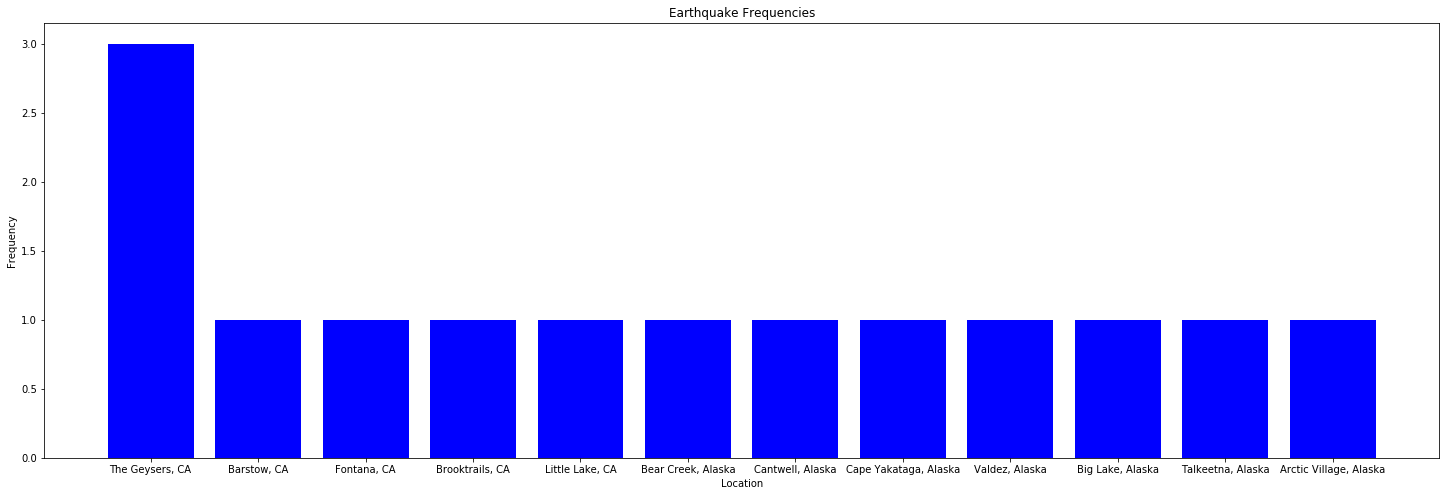

In [9]:
#plot bar graph
plt.figure(figsize=(25,8))
plt.bar(list(counts.keys()), list(counts.values()), color='blue')
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Earthquake Frequencies")
plt.show()

They Geyers, CA, has had 3 earthquake while the other locations have only had 1 quake apiece. 